In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x=plt.imread("arbre.png")
# x=plt.imread("plateforme_2.jpg")

In [20]:
x.shape

(200, 358, 4)

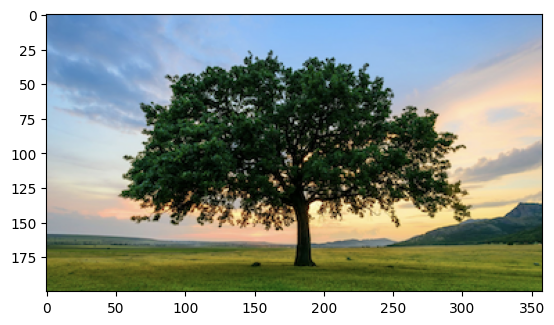

In [21]:
plt.imshow(x)

In [22]:
r = x[:,:,0]
g = x[:,:,1]
b = x[:,:,2]
# t = x[:,:,3]

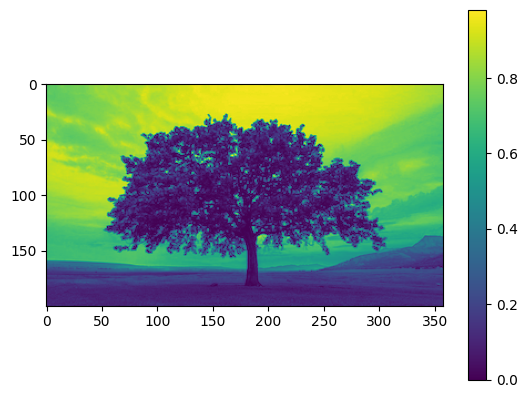

In [23]:
plt.imshow(b)
plt.colorbar()
plt.show()

In [30]:
ur,dr,vr = np.linalg.svd(r, full_matrices=False)
ug,dg,vg = np.linalg.svd(g, full_matrices=False)
ub,db,vb = np.linalg.svd(b, full_matrices=False)
# ut,dt,vt = np.linalg.svd(t, )


In [31]:
dr

array([1.3173921e+02, 5.1250805e+01, 2.0135015e+01, 1.5300321e+01,
       1.1754671e+01, 1.0030798e+01, 8.9514294e+00, 8.2578526e+00,
       7.1438017e+00, 6.8467355e+00, 6.4924717e+00, 6.1545372e+00,
       6.0110211e+00, 5.3902946e+00, 5.2176800e+00, 4.9387550e+00,
       4.7195821e+00, 4.5261421e+00, 4.4282546e+00, 4.1868777e+00,
       4.0750203e+00, 3.9298563e+00, 3.8509722e+00, 3.7463775e+00,
       3.6684408e+00, 3.5981028e+00, 3.4052100e+00, 3.2935996e+00,
       3.2390168e+00, 3.1369870e+00, 3.0788889e+00, 2.9830205e+00,
       2.9239295e+00, 2.9068661e+00, 2.8120091e+00, 2.7509744e+00,
       2.7275307e+00, 2.6317880e+00, 2.5778446e+00, 2.5439317e+00,
       2.4929583e+00, 2.4673474e+00, 2.3888419e+00, 2.3218427e+00,
       2.2191296e+00, 2.2122180e+00, 2.1767859e+00, 2.1374364e+00,
       2.0868526e+00, 2.0533121e+00, 2.0348220e+00, 2.0221930e+00,
       1.9605078e+00, 1.9286113e+00, 1.8922714e+00, 1.8739179e+00,
       1.7903088e+00, 1.7512432e+00, 1.7377774e+00, 1.7031752e

In [32]:
ur.shape

(200, 200)

In [33]:
vr.shape

(200, 358)

In [34]:
dr.shape

(200,)

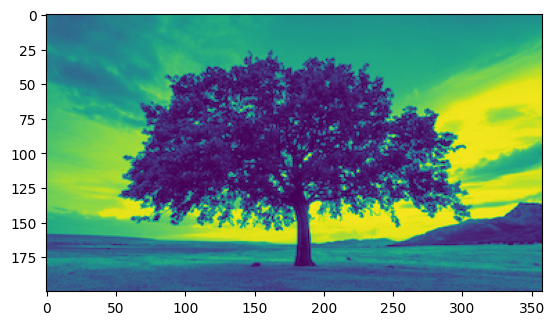

In [35]:
plt.imshow(ur@np.diag(dr)@vr) 

In [36]:
def approx_1(u,d,v, k, plot=True):
    matrix_approximation = u[:,:k]@np.diag(d[:k])@v[:k,:]
    if plot:    plt.imshow(matrix_approximation) 
    return matrix_approximation

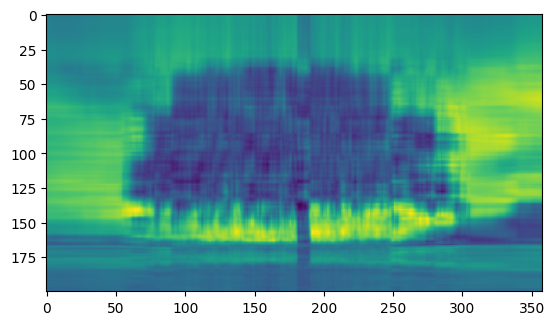

In [37]:
approx_1(ur,dr,vr,7);

In [38]:
def approx_2(u,d,v,k):
    n_col = len(u)
    out = np.zeros(shape=(len(u[0]),len(v[0][0,:]), n_col))
    for i in range(n_col):
        out[:,:,i] = approx_1(u[i], d[i], v[i], k, plot=0)
    return out
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


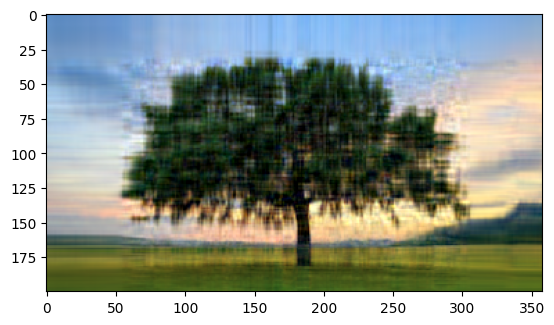

In [40]:
# truc = approx_2([ur,ug,ub,ut],[dr,dg,db,dt],[vr,vg,vb,vt],5)
truc = approx_2([ur,ug,ub],[dr,dg,db],[vr,vg,vb],15)
plt.imshow(truc)
plt.show()